# Pandas 패키지의 소개
<https://datascienceschool.net/view-notebook/ee0a5679dd574b94b55193690992f850/>

Pandas 패키지는 데이터 분석을 할 때 가장 많이 쓰이는 패키지다. 대부분의 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있는데 Pandas 패키지에서는 이러한 표 데이터를 다루기 위한 Series 클래스와 DataFrame 클래스를 제공한다.

 ## 기본 개념

다음 행은 *Pandas* 패키지를 pd라는 이름으로 가져오고 버전을 출력한다.

In [17]:
# Code 1
import pandas as pd
print(pd.__version__)

1.1.5


## Series 클래스

Series 클래스는 NumPy에서 제공하는 1차원 배열과 비슷하지만 각 데이터의 의미를 표시하는 **인덱스(index)**를 붙일 수 있다. 데이터 자체는 **값(value)**라고 한다.

> Series = 값(value) + 인덱스(index)

![Pandas series](https://i1.wp.com/www.emilkhatib.com/wp-content/uploads/2015/10/SeriesEN.png)

### Series 생성

데이터를 리스트나 1차원 배열 형식으로 ``Series`` 클래스 생성자에 넣어주면 Series 클래스 객체를 만들 수 있다. 인덱스의 길이는 데이터의 길이와 같아야 한다. 다음 예에서 이 "서울", "부산" 등의 문자열이 인덱스의 값이다. 인덱스의 값을 **인덱스 라벨(label)**이라고도 한다. 인덱스 라벨은 문자열 뿐 아니라 날짜, 시간, 정수 등도 가능하다.

다음 예제는 각 도시의 2015년 인구 데이터를 Series로 만든 것이다.

In [18]:
s = pd.Series([9904312, 3448737, 2890451, 2466052])

In [19]:
s

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

In [20]:
# Code 2
s = pd.Series([9904312, 3448737, 2890451, 2466052],
              index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

Series의 인덱스는 ``index`` 속성으로 접근할 수 있다. Series의 값은 1차원 배열이며 ``values`` 속성으로 접근할 수 있다.

In [21]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [22]:
s.values

array([9904312, 3448737, 2890451, 2466052])

### Series 인덱싱

Series는 NumPy 배열에서 가능한 인덱스 방법 이외에도 인덱스 라벨을 이용한 인덱싱도 할 수 있다. 배열 인덱싱이나 인덱스 라벨을 이용한 슬라이싱(slicing)도 가능하다. 

In [23]:
s[1], s["부산"]

(3448737, 3448737)

In [24]:
s[3], s["대구"]

(2466052, 2466052)

Series는 딕셔너리와 유사함

In [25]:
dic = {'서울':9904312, '부산':3448737, '인천':2890451, '대구':2466052}

In [26]:
print(dic.keys())
print(dic.values())

dict_keys(['서울', '부산', '인천', '대구'])
dict_values([9904312, 3448737, 2890451, 2466052])


In [27]:
dic['대구']

2466052

In [28]:
dic[3]

KeyError: ignored

## DataFrame 클래스

Series가 1차원 벡터 데이터에 행방향 인덱스(row index)를 붙인 것이라면 **DataFrame** 클래스는 2차원 행렬 데이터에 인덱스를 붙인 것과 비슷하다. 2차원이므로 각각의 행 데이터의 이름이 되는 행방향 인덱스(row index) 뿐 아니라 각각의 열 데이터의 이름이 되는 열방향 인덱스(column index)도 붙일 수 있다.

### DataFrame 생성

앞에서 DataFrame은 2차원 배열 데이터를 기반으로 한다고 했지만 사실은 **공통 인덱스를 가지는 열 Series(column series)를 딕셔너리로 묶어놓은 것**이라고 보는 것이 더 정확하다.

아래 그림은 data라는 변수가 바인딩하고 있는 DataFrame 객체의 내부를 그림으로 나타낸 것이다.

DataFrame 객체는 'col0', 'col1', 'col2'라는 세 개의 Series 객체로 구성되는데, Series 객체의 인덱스는 서로 동일하다.
![DataFrame구조](https://wikidocs.net/images/page/4367/r13.10.png)

In [29]:
# Code 13
col0 = pd.Series([1,2,3,4])
col1 = pd.Series([10,20,30,40])
col2 = pd.Series([100,200,300,400])
data2 = pd.DataFrame({'col0':col0, 'col1':col1, 'col2':col2})
data2 = data2[['col0','col2','col1']]
data2

,col0,col2,col1
0,1,100,10
1,2,200,20
2,3,300,30
3,4,400,40


다음 예제는 각 도시의 년도에 따른 인구 데이터를 DataFrame으로 생성한 것이다. 도시 이름을 index로 지정하였다.

DataFrame은 각 열(column)마다 자료형이 다를 수 있다. 위 예제에서 지역과 인구와 증가율은 각각 문자열, 정수, 부동소수점 실수이다.

각 열에 해당하는 데이터를 Series 생성한 후, column 이름과 딕셔너리로 결합하여 DataFrame을 생성할 수도 있다.

In [30]:
# Code 15
column1 = pd.Series(["수도권", "경상권", "수도권", "경상권"])
column2 = pd.Series([9904312, 3448737, 2890451, 2466052])
column3 = pd.Series([9631482, 3393191, 2632035, 2431774])
column4 = pd.Series([9762546, 3512547, 2517680, 2456016])
column5 = pd.Series([9853972, 3655437, 2466338, 2473990])
column6 = pd.Series([0.0283, 0.0163, 0.0982, 0.0141])

df = pd.DataFrame({'지역':column1, '2015':column2, '2010':column3, 
                    '2005':column4, '2000':column5, '증가율':column6})
#                   index = ['서울', '부산', '인천', '대구'])
df.index = ['서울', '부산', '인천', '대구']
df

,지역,2015,2010,2005,2000,증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


Series와 마찬가지로 데이터만 접근하려면 ``values`` 속성을 사용한다. 열방향 인덱스와 행방향 인덱스는 각각 ``columns``, ``index`` 속성으로 접근한다.

In [31]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [32]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '증가율'], dtype='object')

In [33]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

## DataFrame 인덱싱과 슬라이싱
* 인덱싱은 Series출력
* 슬라이싱은 DataFrame출력

### DataFrame 열 인덱싱

따라서 DataFrame을 인덱싱을 할 때도 열 라벨(column label)을 키값으로 생각하여 인덱싱을 할 수 있다. 인덱스로 라벨 값을 하나만 넣으면 Series 객체가 반환되고 라벨의 배열 또는 리스트를 넣으면 부분적인 DataFrame이 반환된다. 

In [34]:
print(df[:"서울"])

     지역     2015     2010     2005     2000     증가율
서울  수도권  9904312  9631482  9762546  9853972  0.0283


In [35]:
df[["2010", "2015"]]

,2010,2015
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


### 개별 데이터 인덱싱

DataFrame에서 열 라벨로 Series를 인덱싱하고 다시 행 라벨로 개별 데이터를 인덱싱할 수 있다.

In [42]:
df["2015"]["서울"]

9904312

### 행 단위 인덱싱

만약 행 단위로 인덱싱을 하고자 하면 항상 슬라이싱(slicing)을 해야 한다. Series와 같이 라벨 슬라이싱도 가능하다.

In [37]:
df[:1]

,지역,2015,2010,2005,2000,증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283


In [38]:
df[1:2]

,지역,2015,2010,2005,2000,증가율
부산,경상권,3448737,3393191,3512547,3655437,0.0163


In [39]:
df["서울":"부산"]

,지역,2015,2010,2005,2000,증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163


In [44]:
df['2015'] #열 선택불가

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 2015, dtype: int64

##iloc, loc를 이용한 행/열 선택

In [45]:
df.loc['부산'] #행의 인덱스를 사용하여 행을 선택 (Series 출력)

지역          경상권
2015    3448737
2010    3393191
2005    3512547
2000    3655437
증가율      0.0163
Name: 부산, dtype: object

In [46]:
df.loc['부산','2015'] #행과 열의 인덱스로 인덱싱

3448737

In [47]:
df.iloc[0] #행번호로 인덱싱

지역          수도권
2015    9904312
2010    9631482
2005    9762546
2000    9853972
증가율      0.0283
Name: 서울, dtype: object

In [48]:
df.iloc[:2]

,지역,2015,2010,2005,2000,증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163


In [51]:
df.iloc[1,2] #두 번째 행 & 세 번째 열 데이터 추출

3393191

In [52]:
df.iloc[:,0:2]

,지역,2015
서울,수도권,9904312
부산,경상권,3448737
인천,수도권,2890451
대구,경상권,2466052


### 파일 입출력
* 많은 경우에 코드에 데이터를 입력하기보다 전체 파일을 `DataFrame`으로 로드한다. 
* 다음 예는 캘리포니아 부동산 데이터가 있는 파일을 로드한다.

In [53]:
# Code 16
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv", sep=",")
# california_housing_dataframe = pd.read_csv("sample_data/california_housing_test.csv", sep=",")


`DataFrame.head()`: `DataFrame` 레코드 중 처음 몇 개만 표시

In [54]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [55]:
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


 `DataFrame.describe()`: `DataFrame`에 관한 주요 통계값 출력

In [56]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


DataFrame을 csv로 출력

In [57]:
# Code 17
california_housing_dataframe.to_csv('sample1.csv')
california_housing_dataframe.to_csv('sample2.csv', index = False) # index를 출력하지 않음
california_housing_dataframe.to_csv('sample3.csv', header = False) # column 이름을 출력하지 않음

## Visualization


### Series plot

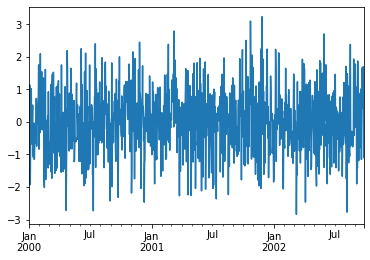

In [58]:
# Code 19
import numpy as np
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

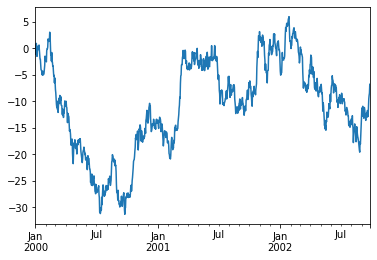

In [59]:
# Code 20
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

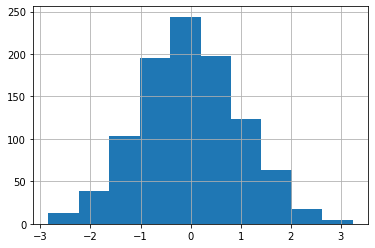

In [60]:
ts.hist()

### DataFrame Plot

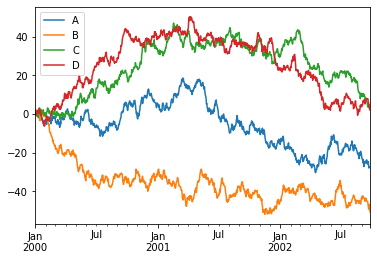

In [61]:
# Code 21
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot();

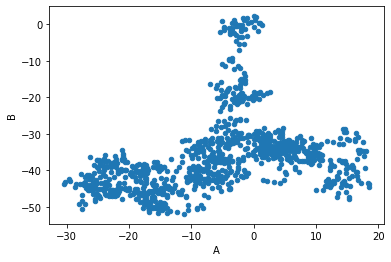

In [62]:
df.plot.scatter(x='A', y='B')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ae0cb2310>,
      dtype=object)

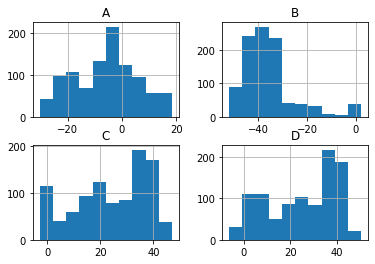

In [63]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ae0ae1310>]],
      dtype=object)

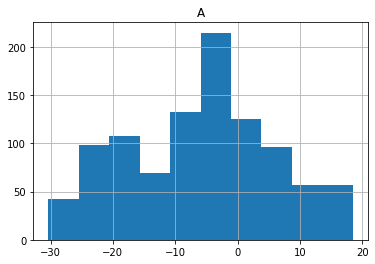

In [64]:
df.hist('A')